In [1]:
import tensorflow
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import tqdm.notebook

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
#visulization functions (SR = Sample Rate)

def waveplot(audio,sr):
    plt.figure(figsize=(14, 5), dpi=100)
    return librosa.display.waveplot(audio, sr=sr)

def spectrogram(audio,sr):
    X = librosa.stft(audio)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5), dpi=100)
    return librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

def mfcc(audio,sr):
    mfccs = librosa.feature.mfcc(audio, sr=sr)
    return librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [3]:
def load_data(path,genres):
    data = []
    labels = []
    srs = []
    
    for genre in genres:
        for file in tqdm.notebook.tqdm(os.listdir(path + genre + "/"), desc = genre):
            mfcc = []
            
            x, sr = librosa.load(path + genre + "/" + file,duration=5)
            x = librosa.feature.mfcc(x, sr=sr)
            for val in x:
                mfcc.append(np.mean(val))
                
            data.append(np.array(mfcc))
            labels.append(genre)
            srs.append(sr)
            
    return np.array(data), np.array(labels), np.array(srs)

In [4]:
data_path = os.getcwd() + "/data/genres/"
genres = os.listdir(data_path)

In [5]:
X,Y, sr = load_data(data_path, genres)

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

le = LabelEncoder()
Y = le.fit_transform(Y)

In [7]:
from sklearn.model_selection import train_test_split

trn_x,val_x,trn_y,val_y = train_test_split(X,Y,test_size=0.10)

In [8]:
shape = X[0].shape

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import optimizers

model = Sequential()

model.add(Dense(256,input_shape=shape,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
adam = optimizers.Adam(lr=0.0001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=adam,
              metrics=['acc'])

In [11]:
history = model.fit(trn_x,trn_y,
                    batch_size=10,
                    epochs=100,
                    validation_data=(val_x,val_y))

Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 766us/sample - loss: 2.2877 - acc: 0.1189 - val_loss: 2.2028 - val_acc: 0.2100
Epoch 2/100
900/900 [==============================] - 0s 155us/sample - loss: 2.0976 - acc: 0.2889 - val_loss: 2.0606 - val_acc: 0.3100
Epoch 3/100
900/900 [==============================] - 0s 194us/sample - loss: 1.9499 - acc: 0.3956 - val_loss: 1.9398 - val_acc: 0.3200
Epoch 4/100
900/900 [==============================] - 0s 204us/sample - loss: 1.8315 - acc: 0.4156 - val_loss: 1.8481 - val_acc: 0.3500
Epoch 5/100
900/900 [==============================] - 0s 209us/sample - loss: 1.7381 - acc: 0.4211 - val_loss: 1.7779 - val_acc: 0.3600
Epoch 6/100
900/900 [==============================] - 0s 195us/sample - loss: 1.6624 - acc: 0.4422 - val_loss: 1.7099 - val_acc: 0.3300
Epoch 7/100
900/900 [==============================] - 0s 198us/sample - loss: 1.5981 - acc: 0.4578 - val_loss: 1.6667 - val_acc: 0.

900/900 [==============================] - 0s 173us/sample - loss: 0.7486 - acc: 0.7722 - val_loss: 1.3053 - val_acc: 0.5400
Epoch 61/100
900/900 [==============================] - 0s 160us/sample - loss: 0.7397 - acc: 0.7756 - val_loss: 1.2852 - val_acc: 0.5400
Epoch 62/100
900/900 [==============================] - 0s 158us/sample - loss: 0.7336 - acc: 0.7744 - val_loss: 1.2878 - val_acc: 0.5300
Epoch 63/100
900/900 [==============================] - 0s 164us/sample - loss: 0.7259 - acc: 0.7756 - val_loss: 1.2890 - val_acc: 0.5400
Epoch 64/100
900/900 [==============================] - 0s 175us/sample - loss: 0.7206 - acc: 0.7856 - val_loss: 1.2916 - val_acc: 0.5400
Epoch 65/100
900/900 [==============================] - 0s 168us/sample - loss: 0.7136 - acc: 0.7856 - val_loss: 1.3013 - val_acc: 0.5400
Epoch 66/100
900/900 [==============================] - 0s 172us/sample - loss: 0.7070 - acc: 0.7878 - val_loss: 1.2842 - val_acc: 0.5400
Epoch 67/100
900/900 [=========================

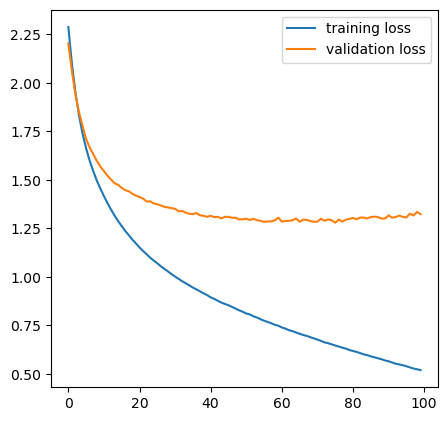

In [12]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend(loc='upper right')